# Analysis the mortality levels discretization.
## Flow: execute after 01_disretization_mortality_levels.

In [1]:
import util
from util import get_default_colors_divergence_seaborn

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Loading data

In [2]:
df_mortality = pd.read_csv('data/df_mortality.csv')[['CODIGO_MUNICIPIO_6', 'MUNICIPIO', 'SIGLA_ESTADO', 'POPULACAO_2022', 'CAPITAL', 'REGIAO', 'TAXA_OBITOS_ACUMULADO', 'TAXA_OBITOS_PRIMEIRO_SEMESTRE_2020', 'TAXA_OBITOS_2020', 'TAXA_OBITOS_2021', 'TAXA_OBITOS_2022', 'NIVEL_TAXA_OBITOS_ACUMULADO',
       'NIVEL_LABEL_TAXA_OBITOS_ACUMULADO', 'NIVEL_LABEL_TAXA_OBITOS_PRIMEIRO_SEMESTRE_2020', 'NIVEL_TAXA_OBITOS_2020',
       'NIVEL_LABEL_TAXA_OBITOS_2020',
       'NIVEL_TAXA_OBITOS_2021',
       'NIVEL_LABEL_TAXA_OBITOS_2021',
       'NIVEL_TAXA_OBITOS_2022',
       'NIVEL_LABEL_TAXA_OBITOS_2022']].copy()
df_mortality.CODIGO_MUNICIPIO_6 = df_mortality.CODIGO_MUNICIPIO_6.astype('Int64')

In [3]:
df_mortality

,CODIGO_MUNICIPIO_6,MUNICIPIO,SIGLA_ESTADO,POPULACAO_2022,CAPITAL,REGIAO,TAXA_OBITOS_ACUMULADO,TAXA_OBITOS_PRIMEIRO_SEMESTRE_2020,TAXA_OBITOS_2020,TAXA_OBITOS_2021,TAXA_OBITOS_2022,NIVEL_TAXA_OBITOS_ACUMULADO,NIVEL_LABEL_TAXA_OBITOS_ACUMULADO,NIVEL_LABEL_TAXA_OBITOS_PRIMEIRO_SEMESTRE_2020,NIVEL_TAXA_OBITOS_2020,NIVEL_LABEL_TAXA_OBITOS_2020,NIVEL_TAXA_OBITOS_2021,NIVEL_LABEL_TAXA_OBITOS_2021,NIVEL_TAXA_OBITOS_2022,NIVEL_LABEL_TAXA_OBITOS_2022
0,110001,Alta Floresta D'Oeste,RO,21495,0,Norte,432.658758,0.000000,74.435915,307.048151,51.174692,2,Very high,Very low,4,Intermediate,4,Very high,5,High
1,110002,Ariquemes,RO,96833,0,Norte,557.661128,20.654116,125.990107,393.460907,38.210114,4,Extremely high,Intermediate,1,High,4,Very high,0,Intermediate
2,110003,Cabixi,RO,5363,0,Norte,279.694201,18.646280,74.585120,186.462801,18.646280,3,Intermediate,Low,4,Intermediate,0,Intermediate,2,Low
3,110004,Cacoal,RO,86895,0,Norte,403.935785,6.904885,69.048852,306.116577,28.770355,2,Very high,Low,4,Intermediate,4,Very high,2,Low
4,110005,Cerejeiras,RO,15890,0,Norte,478.288232,12.586532,50.346130,365.009440,62.932662,2,Very high,Low,0,Low,4,Very high,5,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5565,522200,Vianópolis,GO,14956,0,Centro-Oeste,314.255148,0.000000,46.803958,213.960952,53.490238,0,High,Very low,0,Low,1,High,5,High
5566,522205,Vicentinópolis,GO,8768,0,Centro-Oeste,387.773723,11.405109,91.240876,285.127737,11.405109,0,High,Low,1,High,1,High,2,Low
5567,522220,Vila Boa,GO,4215,0,Centro-Oeste,166.073547,0.000000,47.449585,71.174377,47.449585,1,Low,Very low,0,Low,3,Very low,0,Intermediate
5568,522230,Vila Propício,GO,5815,0,Centro-Oeste,189.165950,17.196905,51.590714,120.378332,17.196905,1,Low,Low,4,Intermediate,5,Low,2,Low


In [5]:
df_mortality.sum()[['TAXA_OBITOS_2020','TAXA_OBITOS_2021','TAXA_OBITOS_2022']] / df_mortality.sum()['TAXA_OBITOS_ACUMULADO']

TAXA_OBITOS_2020    0.240524
TAXA_OBITOS_2021    0.648195
TAXA_OBITOS_2022     0.11128
dtype: object

## Plot charts

### Figure 5

<ipython-input-24-606b22a2d5ac>:27: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.tight_layout()
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


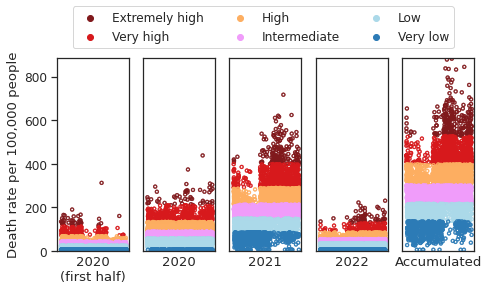

In [24]:
sns.set(font_scale=1.1)
sns.set_style("ticks")
palette = get_default_colors_divergence_seaborn(6, reverse=True)
fig, ax =plt.subplots(1,5, figsize=(util.centimeter_to_inch(19), util.centimeter_to_inch(9)))

min_y = min(df_mortality.TAXA_OBITOS_2020.min(), df_mortality.TAXA_OBITOS_2021.min(), df_mortality.TAXA_OBITOS_2022.min(), df_mortality.TAXA_OBITOS_ACUMULADO.min())
max_y = max(df_mortality.TAXA_OBITOS_2020.max(), df_mortality.TAXA_OBITOS_2021.max(), df_mortality.TAXA_OBITOS_2022.max(), df_mortality.TAXA_OBITOS_ACUMULADO.max())

j = 0
for column_wave, label in zip(['TAXA_OBITOS_PRIMEIRO_SEMESTRE_2020', 'TAXA_OBITOS_2020', 'TAXA_OBITOS_2021', 'TAXA_OBITOS_2022', 'TAXA_OBITOS_ACUMULADO'], ['2020\n(first half)', '2020', '2021', '2022', 'Accumulated']):
       df = df_mortality

       column_level_label = 'NIVEL_LABEL_' + column_wave
       df = df.sort_values(column_wave, ascending=False)
       chart = sns.scatterplot(x=df.index, y=df[column_wave], palette=palette, hue=df[column_level_label], ax=ax[j], legend=True, marker="$\circ$", ec="face")
       chart.get_legend().remove()
       chart.set(ylim=(min_y, max_y), xlabel=label)
       chart.set(xticks=[])
       if j == 0:
              chart.set(ylabel='Death rate per 100,000 people')
       else:
              chart.set(ylabel=None)
              chart.set(yticks=[])
       j += 1
plt.legend(ncol=3, loc='upper right', bbox_to_anchor=(0.8, 1.3), frameon=True)

fig.tight_layout()

plt.savefig('images/mortality_levels.png', bbox_inches="tight")
plt.savefig('images/mortality_levels.eps', bbox_inches="tight")
plt.savefig('images/mortality_levels.pdf', bbox_inches="tight")
plt.show()

In [25]:
df_mortality.columns

Index(['CODIGO_MUNICIPIO_6', 'MUNICIPIO', 'SIGLA_ESTADO', 'POPULACAO_2022',
       'CAPITAL', 'REGIAO', 'TAXA_OBITOS_ACUMULADO',
       'TAXA_OBITOS_PRIMEIRO_SEMESTRE_2020', 'TAXA_OBITOS_2020',
       'TAXA_OBITOS_2021', 'TAXA_OBITOS_2022', 'NIVEL_TAXA_OBITOS_ACUMULADO',
       'NIVEL_LABEL_TAXA_OBITOS_ACUMULADO',
       'NIVEL_LABEL_TAXA_OBITOS_PRIMEIRO_SEMESTRE_2020',
       'NIVEL_TAXA_OBITOS_2020', 'NIVEL_LABEL_TAXA_OBITOS_2020',
       'NIVEL_TAXA_OBITOS_2021', 'NIVEL_LABEL_TAXA_OBITOS_2021',
       'NIVEL_TAXA_OBITOS_2022', 'NIVEL_LABEL_TAXA_OBITOS_2022'],
      dtype='object')

In [26]:
df_mortality.groupby(['REGIAO']).count()

,CODIGO_MUNICIPIO_6,MUNICIPIO,SIGLA_ESTADO,POPULACAO_2022,CAPITAL,TAXA_OBITOS_ACUMULADO,TAXA_OBITOS_PRIMEIRO_SEMESTRE_2020,TAXA_OBITOS_2020,TAXA_OBITOS_2021,TAXA_OBITOS_2022,NIVEL_TAXA_OBITOS_ACUMULADO,NIVEL_LABEL_TAXA_OBITOS_ACUMULADO,NIVEL_LABEL_TAXA_OBITOS_PRIMEIRO_SEMESTRE_2020,NIVEL_TAXA_OBITOS_2020,NIVEL_LABEL_TAXA_OBITOS_2020,NIVEL_TAXA_OBITOS_2021,NIVEL_LABEL_TAXA_OBITOS_2021,NIVEL_TAXA_OBITOS_2022,NIVEL_LABEL_TAXA_OBITOS_2022
REGIAO,,,,,,,,,,,,,,,,,,,
Centro-Oeste,467,467,467,467,467,467,467,467,467,467,467,467,467,467,467,467,467,467,467
Nordeste,1794,1794,1794,1794,1794,1794,1794,1794,1794,1794,1794,1794,1794,1794,1794,1794,1794,1794,1794
Norte,450,450,450,450,450,450,450,450,450,450,450,450,450,450,450,450,450,450,450
Sudeste,1668,1668,1668,1668,1668,1668,1668,1668,1668,1668,1668,1668,1668,1668,1668,1668,1668,1668,1668
Sul,1191,1191,1191,1191,1191,1191,1191,1191,1191,1191,1191,1191,1191,1191,1191,1191,1191,1191,1191


In [39]:
df_mortality.groupby(['NIVEL_LABEL_TAXA_OBITOS_2022']).count()['CODIGO_MUNICIPIO_6']

NIVEL_LABEL_TAXA_OBITOS_2022
Extremely high      63
High               739
Intermediate      1427
Low               2310
Very high          203
Very low           828
Name: CODIGO_MUNICIPIO_6, dtype: int64

In [33]:
temp = (df_mortality.groupby(['REGIAO', 'NIVEL_LABEL_TAXA_OBITOS_2021']).count()['CODIGO_MUNICIPIO_6']/df_mortality.groupby(['REGIAO']).count()['CODIGO_MUNICIPIO_6']*100).reset_index()

In [34]:
temp[temp.NIVEL_LABEL_TAXA_OBITOS_2021.isin(['High', 'Very high', 'Extremely high'])].groupby('REGIAO').sum()

,CODIGO_MUNICIPIO_6
REGIAO,
Centro-Oeste,55.674518
Nordeste,4.570792
Norte,22.444444
Sudeste,52.398082
Sul,48.194794


In [32]:
temp[temp.NIVEL_LABEL_TAXA_OBITOS_2022.isin(['High', 'Very high', 'Extremely high'])].groupby('REGIAO').sum()

,CODIGO_MUNICIPIO_6
REGIAO,
Centro-Oeste,21.413276
Nordeste,5.072464
Norte,8.000000
Sudeste,30.935252
Sul,21.998321


In [8]:
df_mortality[df_mortality.NIVEL_LABEL_TAXA_OBITOS_2020 == 'Extremely high'].TAXA_OBITOS_2020.describe()

count     53.000000
mean     248.766691
std       41.907814
min      205.133149
25%      216.986981
50%      235.640648
75%      269.211943
max      433.526012
Name: TAXA_OBITOS_2020, dtype: float64

In [9]:
df_mortality[df_mortality.NIVEL_LABEL_TAXA_OBITOS_2021 == 'Extremely high'].TAXA_OBITOS_2021.describe()

count    173.000000
mean     453.484359
std       55.687843
min      394.396044
25%      411.240576
50%      434.606832
75%      473.036897
max      712.634823
Name: TAXA_OBITOS_2021, dtype: float64

In [10]:
df_mortality[df_mortality.NIVEL_LABEL_TAXA_OBITOS_2022 == 'Extremely high'].TAXA_OBITOS_2022.describe()

count     63.000000
mean     150.453582
std       23.932252
min      124.285359
25%      133.082822
50%      143.884892
75%      159.152011
max      225.479143
Name: TAXA_OBITOS_2022, dtype: float64

In [11]:
df_mortality[df_mortality.NIVEL_LABEL_TAXA_OBITOS_ACUMULADO == 'Extremely high'].TAXA_OBITOS_ACUMULADO.describe()

count    247.000000
mean     598.281541
std       70.636520
min      524.344569
25%      544.703732
50%      581.000102
75%      624.429436
max      885.296382
Name: TAXA_OBITOS_ACUMULADO, dtype: float64